<a href="https://colab.research.google.com/github/vishal120700/Retail-Sales-prediction/blob/main/Individual_Retail_Sales_Prediction_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** Vishal Pagare


# **Project Summary -**

• In the Rossmann sales prediction project there is a dataset which contains sales information.

• The shape of Rossmann dataset = 1017209, 8 and Store dataset = 1115, 10.

• In both dataset ‘Store’ column is common. So we do inner join on the basis of column ‘Store’.

• This dataset is a live dataset of Rossmann Stores. On analyzing this problem we observe that Rossmann problem is a regression problem and our primarily goal is to predict the sales figures of Rossmann problem.

In this Notebook we are going to work on following topics:-

Analyzing the dataset by using Exploratory Data Analysis using exponential moving averages analysis trends and seasonality in Rossmann dataset Analyze Regression using following prediction analysis.

A) Linear Regression Analysis.

B) Elastic Regression (Lasso & Ridge Regression).

C) Decision tree.


# **GitHub Link -**

* **Vishal Pagare -**  https://github.com/vishal120700/Retail-Sales-prediction

# **Problem Statement**


**Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.**

**You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import datetime
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objs as go
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

### Dataset Loading

In [3]:
# Load Dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Loading Rossmann Dataset

In [6]:
Data = pd.read_csv("/content/drive/MyDrive/Retail Sales Prediction/Rossmann Stores Data.csv")

rossmann_df = pd.DataFrame(Data)

print("Data has been successfully imported")

Data has been successfully imported


In [7]:
# Loading Store Dataset.

In [8]:
Data = pd.read_csv("/content/drive/MyDrive/Retail Sales Prediction/store.csv")

store_df = pd.DataFrame(Data)

print("Data has been successfully imported")

Data has been successfully imported


### Dataset First View

In [9]:
# Dataset First Look

In [10]:
rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [11]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [12]:
# Dataset Rows & Columns count

In [13]:
rossmann_df.shape

(1017209, 9)

In [14]:
store_df.shape

(1115, 10)

### Dataset Information

In [15]:
# Dataset Info

In [16]:
rossmann_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [17]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [18]:
# Rossmann Dataset Duplicate Value Count

In [19]:
rossmann_df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1017204    False
1017205    False
1017206    False
1017207    False
1017208    False
Length: 1017209, dtype: bool

In [20]:
rossmann_df[rossmann_df.duplicated(keep = False)].count()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [21]:
# Store Dataset Duplicate Value Count

In [22]:
store_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1110    False
1111    False
1112    False
1113    False
1114    False
Length: 1115, dtype: bool

In [23]:
store_df[store_df.duplicated(keep = False)].count()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

#### Missing Values/Null Values

In [24]:
# Missing Values/Null Values Count

In [25]:
rossmann_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [26]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [27]:
# Visualizing the missing values

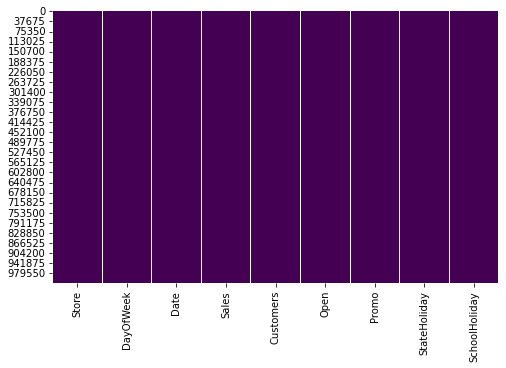

In [28]:
plt.figure(figsize=(8,5))
sns.heatmap(rossmann_df.isnull(), cbar=False, cmap='viridis')

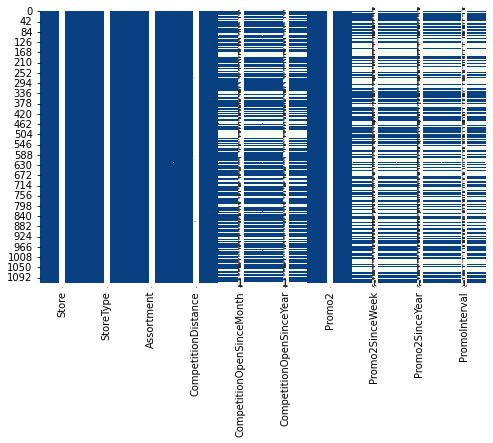

In [29]:
plt.figure(figsize=(8,5))
sns.heatmap(store_df.isnull(), cbar=False, annot=True, fmt='d', cmap='GnBu_r')

### What did you know about your dataset?

* **rossmann_df DataSet**

* The retail sales prediction dataset contains information about various stores 
and their sales on a given day.

* The dataset has 1017209 rows and 9 columns with no missing or null values and no duplicate values.

* The dataset includes various features such as the store ID, store type, sales, number of customers, whether the store was open or closed, state holidays, school holidays, the distance to the nearest competitor store, the opening date of the nearest competitor store, information about promotions, and the interval of promotions. 


* **store_df DataSet**

* The dataset has 1115 rows and 10 columns with no duplicate values.

* The retail sales prediction dataset has several columns with missing values, including CompetitionDistance with 3 missing values, CompetitionOpenSinceMonth and CompetitionOpenSinceYear both with 354 missing values, Promo2SinceWeek and Promo2SinceYear both with 544 missing values, and PromoInterval with 544 missing values. On the other hand, the column Promo2 does not have any missing values

## ***2. Understanding Your Variables***

In [30]:
# Dataset Columns

In [31]:
rossmann_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [32]:
store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [33]:
# Dataset Describe

In [34]:
rossmann_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [35]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


### Variables Description 

* **rossmann_df DataSet**

**This data includes information about different stores. The variables in the data are:**

* Store : Identifier for each store

* DayOfWeek : The day of the week, with Monday being 1 and Sunday being 7

* Sales : The amount of sales made at the store on that day

* Customers : The number of customers who visited the store on that day

* Open : Indicator of whether the store was open on that day (0 or 1)

* Promo : Indicator of whether there was a promotion taking place at the store on that day (0 or 1)

* SchoolHoliday : Indicator of whether it was a school holiday on that day (0 or 1)

**The statistics provided for each variable are:**

* Count: Total number of records
* Mean: Average value of the variable
* Standard Deviation: Measure of the spread of the variable's values
* Minimum: Smallest value in the variable
* 25th Percentile: Value below which 25% of the variable's values fall
* Median (50th Percentile): Middle value of the variable
* 75th Percentile: Value below which 75% of the variable's values fall
* Maximum: Largest value in the variable

* **store_df DataSet**

**This data set includes information about different stores, including the following variables:**
* Store: Identifier for each store
* CompetitionDistance: The distance of the nearest competitor from the store
* CompetitionOpenSinceMonth: Month the nearest competitor was opened
* CompetitionOpenSinceYear: Year the nearest competitor was opened
* Promo2: Indicator of whether the store is running a promotion
* Promo2SinceWeek: Week the store started running the promotion
* Promo2SinceYear: Year the store started running the promotion

**The statistics provided give an overview of the distribution of each variable's values.**

* The data for the variables "CompetitionDistance" has a mean of 5404.90, std dev of 7663.17, and a range of 20 to 75860 with 3 missing values.

* "CompetitionOpenSinceMonth" and "CompetitionOpenSinceYear" have means of 7.22 and 2008.67, std dev of 3.21 and 6.20, and ranges of 1-12 and 1900-2015 with 354 missing values.

* "Promo2" has a mean of 0.51 and no missing values, while "Promo2SinceWeek" and "Promo2SinceYear" have means of 23.60 and 2011.76, std dev of 14.14 and 1.67, and ranges of 1-50 and 2009-2015 with 544 missing values.

### Check Unique Values for each variable.

In [36]:
# Check Unique Values for each variable.

In [37]:
# For rossmann_df

In [38]:
column_list = rossmann_df.columns.values.tolist()
for i in column_list:
    print("Number of unique values in", i, "is", len(rossmann_df[i].unique()))

Number of unique values in Store is 1115
Number of unique values in DayOfWeek is 7
Number of unique values in Date is 942
Number of unique values in Sales is 21734
Number of unique values in Customers is 4086
Number of unique values in Open is 2
Number of unique values in Promo is 2
Number of unique values in StateHoliday is 5
Number of unique values in SchoolHoliday is 2


In [39]:
# For store_df

In [40]:
column_list = store_df.columns.values.tolist()
for i in column_list:
    print("Number of unique values in", i, "is", len(store_df[i].unique()))

Number of unique values in Store is 1115
Number of unique values in StoreType is 4
Number of unique values in Assortment is 3
Number of unique values in CompetitionDistance is 655
Number of unique values in CompetitionOpenSinceMonth is 13
Number of unique values in CompetitionOpenSinceYear is 24
Number of unique values in Promo2 is 2
Number of unique values in Promo2SinceWeek is 25
Number of unique values in Promo2SinceYear is 8
Number of unique values in PromoInterval is 4


## 3. ***Data Wrangling***

### Data Wrangling Code

In [41]:
# Write your code to make your dataset analysis ready.

In [42]:
# Convert data types for columns as needed

rossmann_df['Date'] = pd.to_datetime(rossmann_df['Date'])
rossmann_df['StateHoliday'] = rossmann_df['StateHoliday'].astype('category')

In [43]:
# Convert data types for columns as needed

store_df['StoreType'] = store_df['StoreType'].astype('category')
store_df['Assortment'] = store_df['Assortment'].astype('category')

In [44]:
# extract year, month, day and week of year from "Date"
rossmann_df['Date']=pd.to_datetime(rossmann_df['Date'])
rossmann_df['Year'] = rossmann_df['Date'].apply(lambda x: x.year)
rossmann_df['Month'] = rossmann_df['Date'].apply(lambda x: x.month)
rossmann_df['Day'] = rossmann_df['Date'].apply(lambda x: x.day)

In [45]:
# Rename columns as needed

rossmann_df.rename(columns={'CompetitionDistance': 'DistanceToNearestCompetitor',
'CompetitionOpenSinceMonth': 'CompetitorOpenMonth',
'CompetitionOpenSinceYear': 'CompetitorOpenYear'}, inplace=True)

In [46]:
# drop column 'Datae'
rossmann_df = rossmann_df.drop(['Date'],axis=1)

**We will eliminate columns where more than 30% of values are absent, as these features are unlikely to provide reliable information.**

In [47]:
# remove features
store_df = store_df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

**Replace missing values in features with low percentages of missing values**

Text(0.5, 1.0, 'Distribution of Store Competition Distance')

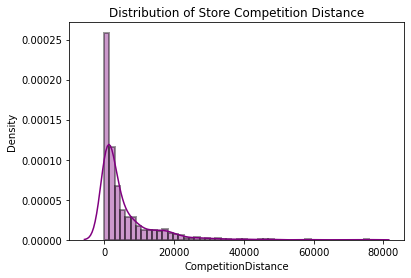

In [48]:
# CompetitionDistance is distance in meters to the nearest competitor store
# let's first have a look at its distribution

sns.distplot(store_df.CompetitionDistance.dropna(), color='purple', hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of Store Competition Distance")

In [49]:
# replace missing values in CompetitionDistance with median for the store dataset

store_df.CompetitionDistance.fillna(store_df.CompetitionDistance.median(), inplace=True)

### What all manipulations have you done and insights you found?

* In this dataset we have found sales data from 2013 to 2015 

* In this dataset we extracted the 'Year', 'Month', 'Day', and 'WeekOfYear' and created new columns from date column.  

* In this dataset we sorted the values by date and store columns in descending ascending order

* The sales data is for 5 stores and covers the date range from 2015-07-31 to 2015-07-31.

* The stores were open on the day of the sales, and some stores were running promotions.

* It was not a state holiday or a school holiday on the day of the sales.
The data includes sales data for the month of July in the year 2015.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

* ***Rossmann DataSet Visualization***

#### Chart - 1 - Barplot

In [50]:
# Chart - 1 visualization code

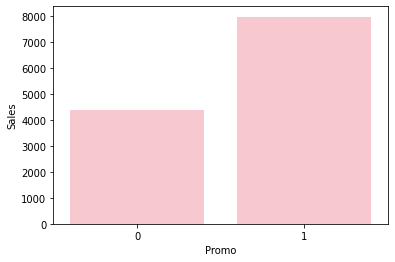

In [51]:
#Impact of promo on sales

promo_sales = rossmann_df.groupby("Promo")["Sales"].mean().reset_index()
sns.barplot(x="Promo", y="Sales", data=promo_sales, color='pink')

##### 1. Why did you pick the specific chart?

* The specific chart was picked as a bar plot to visually compare the average sales for each group of "Promo" (with or without a promotion) in a simple and straightforward manner.

##### 2. What is/are the insight(s) found from the chart?

* The insight found from the chart is the average sales impact of promotions on sales, as evidenced by the comparison of the height of the bars for each "Promo" group.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* Whether the gained insights will help create a positive business impact depends on the specifics of the situation, such as the target audience, the promotion strategy, and the market conditions. The insights from the chart alone do not provide enough information to determine if the promotions have led to negative growth. Further analysis and context are needed to determine if the promotions have had a positive or negative effect on sales.

#### Chart - 2 - Barplot

In [52]:
# Chart - 2 visualization code

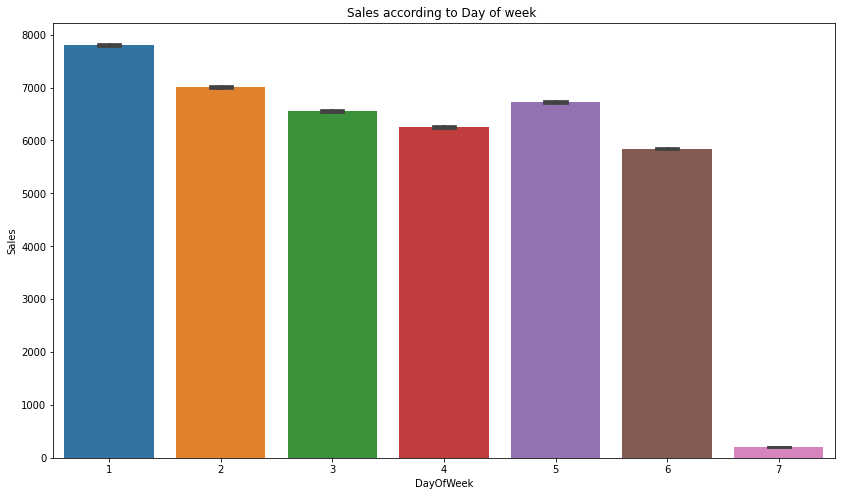

In [53]:
fig,ax=plt.subplots(figsize=(14,8))
sns.barplot(data = rossmann_df,x='DayOfWeek',y='Sales',ax=ax,capsize=.2)
ax.set(title='Sales according to Day of week ')
plt.show()


##### 1. Why did you pick the specific chart?

* We are plotting Bar graph to see the Sales according to Days in week.

##### 2. What is/are the insight(s) found from the chart?

* We can conclude that sells are high on Monday and low on Sunday.

* It may be because of holiday and on holiday people prefer to do other things than shopping.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* Stores have to try increasing sell on sunday or they can close the store for half day on sunday to minimize expenditure.

#### Chart - 3 - Countplot

In [54]:
# Chart - 3 visualization code

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

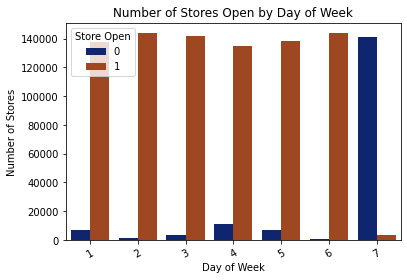

In [55]:
sns.countplot(x='DayOfWeek', hue='Open', data=rossmann_df, palette="dark")
plt.title("Number of Stores Open by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Stores")
plt.legend(title="Store Open")
plt.xticks(rotation=30)

##### 1. Why did you pick the specific chart?

* I chose a countplot with hue set to Open to show the number of stores that are open on each day of the week, and to visually distinguish between open and closed stores

##### 2. What is/are the insight(s) found from the chart?

* The insight from the chart is that it shows the distribution of the number of open stores by day of the week, allowing us to determine the days where the majority of stores are open and closed.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1. Positive impact: The insights from the chart can help inform business decisions, such as staffing and inventory planning, based on the days where the most stores are openAnswer Here

2. Neutral impact: The chart does not necessarily provide any insights that lead to negative growth, as it simply shows the distribution of open stores by day of the week.

3. Further analysis needed: To determine if the insights will have a positive or negative impact on business growth, additional analysis is needed to understand the relationship between store open days and other factors such as sales and customer traffic.

#### Chart - 4 - Boxplot

In [56]:
# Chart - 4 visualization code

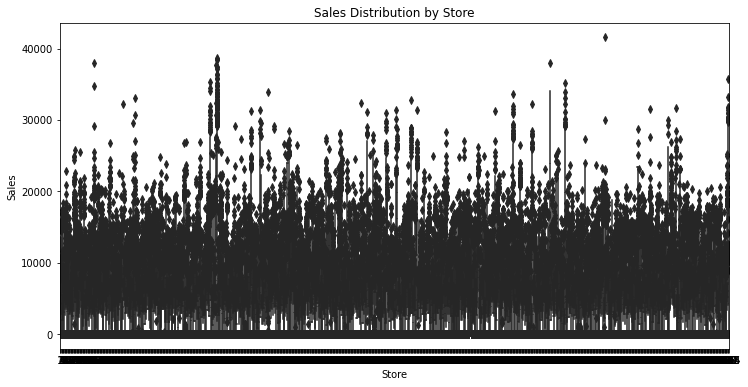

In [57]:
# Plot box plot of sales distribution by store.
plt.figure(figsize=(12, 6))
sns.boxplot(x='Store', y='Sales', data=rossmann_df, color='Purple')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.title('Sales Distribution by Store')
plt.show()

##### 1. Why did you pick the specific chart?

* A box plot was chosen to display the distribution of sales across different stores because it provides a clear representation of the median, quartiles, and outliers of the sales data.

##### 2. What is/are the insight(s) found from the chart?

* A box plot was chosen to display the distribution of sales across different stores because it provides a clear representation of the median, quartiles, and outliers of the sales data.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* The insights gained from the chart could potentially help create a positive business impact by allowing for identification of stores with higher or lower sales performance, enabling the company to make data-driven decisions to optimize sales and improve overall business performance.

#### Chart - 5 - Correlation Heatmap

In [58]:
# Chart - 5 visualization code

In [59]:
# Correlation Heatmap visualization code

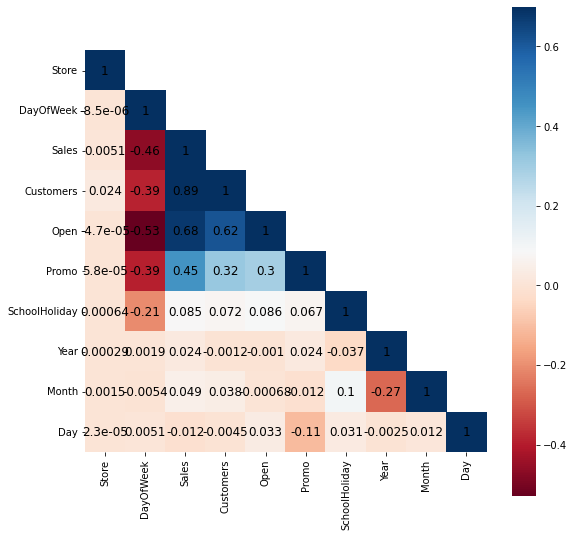

In [60]:
correlation_map = rossmann_df[rossmann_df.columns].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(9,9)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True,cmap = "RdBu", annot_kws={"size": 12, "color": "black"}, ax=ax)

##### 1. Why did you pick the specific chart?

* The heatmap chart was picked because it is an effective way to visualize and analyze the correlation between different variables in a dataset by displaying their values as colors in a grid.

##### 2. What is/are the insight(s) found from the chart?

* The insights found from the heatmap chart are the strengths of the correlations between the variables in the dataset, as represented by the color intensity and values displayed in the grid.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* It is possible that the insights gained from the heatmap chart can help create a positive business impact by providing a visual representation of the relationships between variables, which can inform decision making and strategic planning.

* The heatmap insights can impact business growth positively or negatively depending on the correlations shown between variables related to business growth. Positive correlations may lead to growth while negative correlations highlight potential risks and challenges that need addressing.

#### Chart - 6 - Pair Plot 

In [61]:
# Chart - 6 visualization code

In [62]:
# Pair Plot visualization code

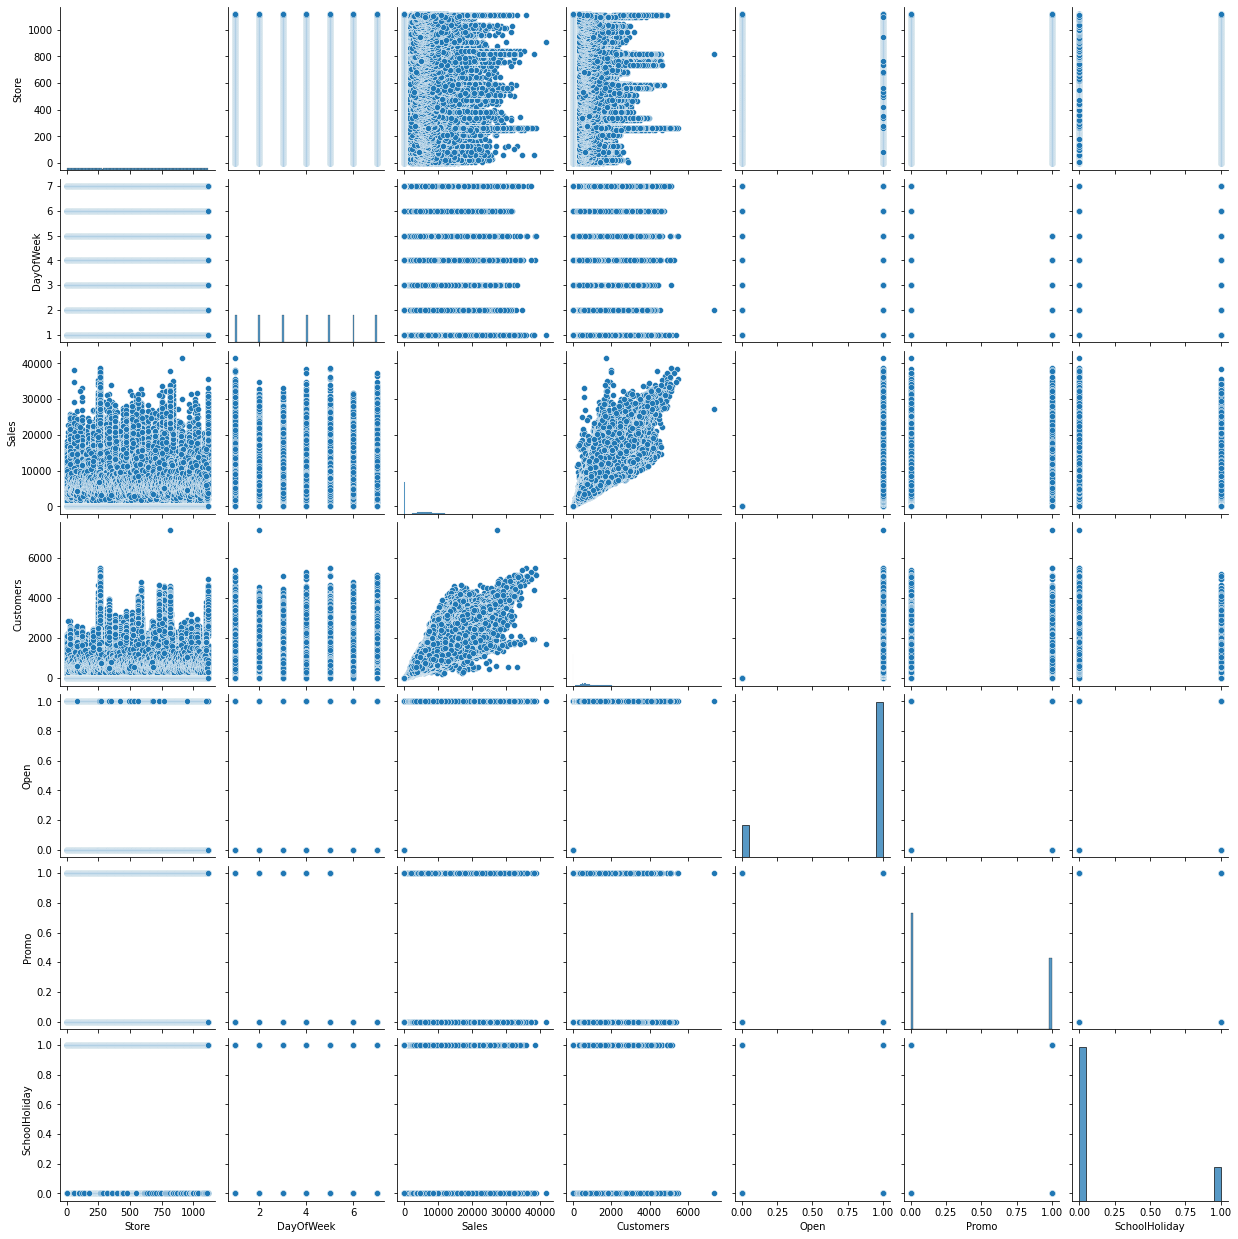

In [63]:
sns.pairplot(rossmann_df[["Store", "DayOfWeek", "Sales", "Customers", "Open", "Promo", "SchoolHoliday"]])
plt.show()

##### 1. Why did you pick the specific chart?

* The specific chart was picked as a pairplot because it is a convenient way to visualize the relationships between multiple variables in a dataset, making it useful for exploring and discovering patterns in the data.

##### 2. What is/are the insight(s) found from the chart?

* The scatter plots can reveal relationships and outliers between variables.

* The histograms along the diagonal show the distributions of each variable and their shape and spread.

* The scatter plots can reveal correlations between variables, which can indicate relationships between them

* Comparing multiple variables in one plot helps identify the relationships and importance of each variable for analysis.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* The impact of the insights from the pairplot on the business is dependent on context and further analysis is needed to determine relationships between variables and their impact on the business outcomes.

* ***Store DataSet Visualization***

#### Chart - 7 - Crosstab

In [64]:
# Chart - 7 visualization code

Text(0, 0.5, 'Count')

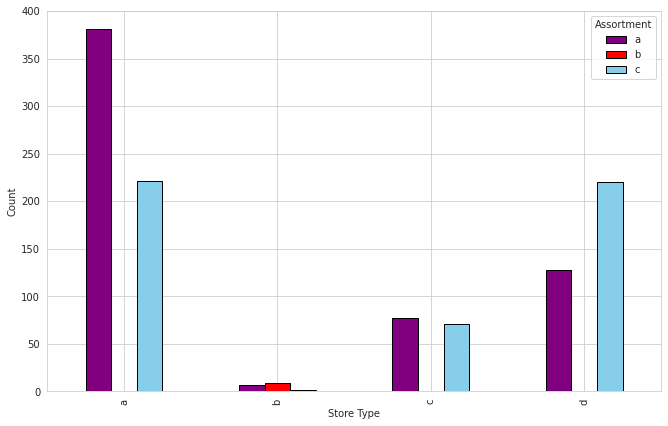

In [65]:
sns.set_style("whitegrid")
store_df_grouped = pd.crosstab(index=store_df['StoreType'], columns=store_df['Assortment'])
store_df_grouped.plot.bar(color=["purple", "red", "skyblue"], figsize=(11,7), edgecolor='black')
plt.xlabel('Store Type')
plt.ylabel('Count')

##### 1. Why did you pick the specific chart?

* I chose a stacked bar chart because it effectively compares the distribution of a categorical variable across multiple groups, such as the Assortment variable across different StoreType groups.

##### 2. What is/are the insight(s) found from the chart?

* Insights from a stacked bar chart of a categorical variable include the total count of each group and the distribution of the variable within each group, which can reveal patterns, trends, and differences or similarities between groups.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* Insights from a stacked bar chart of a categorical variable can help create a positive business impact by providing a clear understanding of the distribution of a categorical variable across different groups, which can inform decision-making and strategic planning.

* However, there may also be insights that could lead to negative growth if the chart reveals less popular or less profitable areas, indicating potential risks that need addressing. Therefore, interpreting the insights gained from the chart carefully and considering them in the context of the specific business and research questions is crucial.

#### Chart - 8

In [66]:
# Chart - 8 visualization code

In [67]:
# Correlation Heatmap visualization code

Text(0.5, 1.0, 'Absolute Correlation Heatmap')

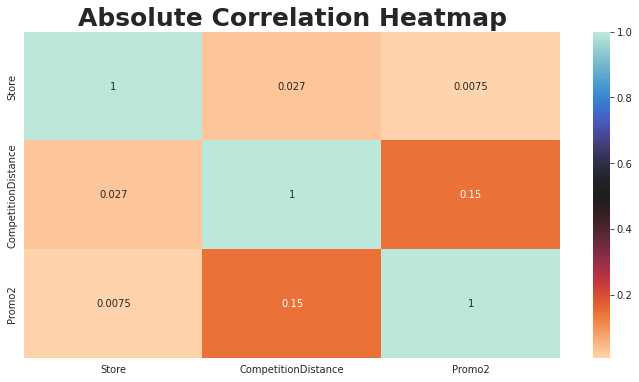

In [68]:
# set figure size
plt.figure(figsize=(12,6))

# create the heatmap with annotations
sns.heatmap(store_df.corr().abs(), annot=True, cmap="icefire_r")

# set the title for the heatmap
plt.title("Absolute Correlation Heatmap", fontsize=25, fontweight="bold")


##### 1. Why did you pick the specific chart?

* Heatmaps represent data in a matrix using color-coding and are effective for visualizing correlations and distributions.

##### 2. What is/are the insight(s) found from the chart?

* Heatmaps can reveal the strength and direction of correlation, clusters of correlated variables, and outliers in the data.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* The heatmap's insights can impact business positively/negatively by providing a visual representation of variable relationships that inform decision making and strategic planning. Positive correlations can lead to growth, while negative correlations highlight potential risks that require addressing.

#### Chart - 9 - Pairplot

In [69]:
# Chart - 9 visualization code

In [70]:
# Pair Plot visualization code

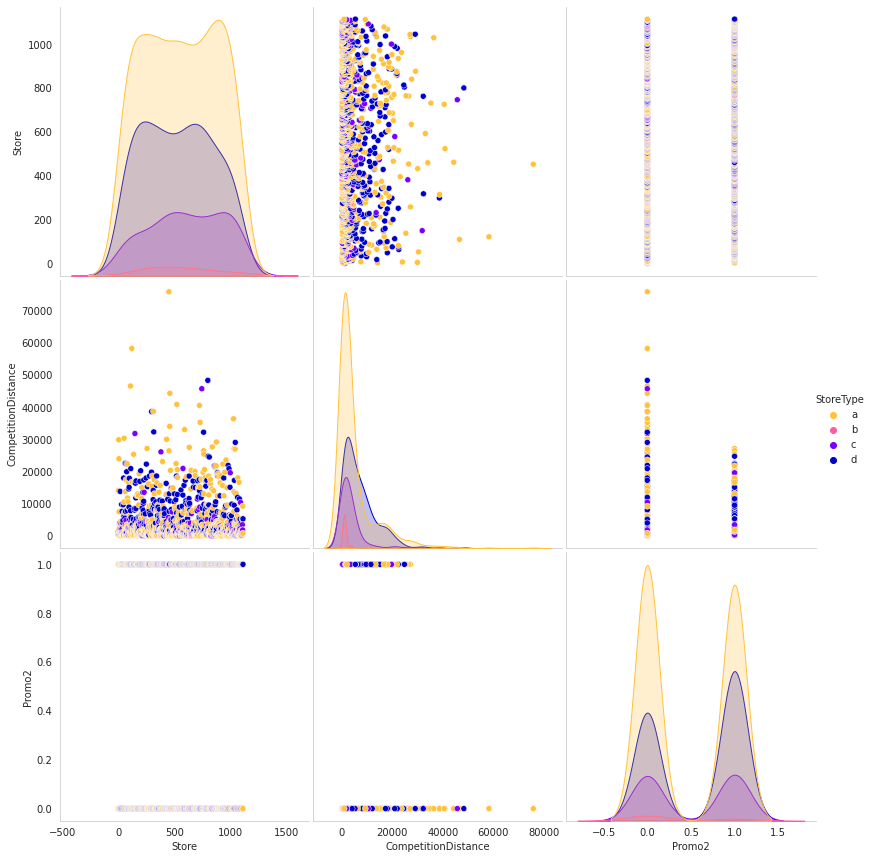

In [71]:
sns.set_style("whitegrid", {'axes.grid' : False})
pp = sns.pairplot(store_df, hue='StoreType', palette='gnuplot2_r', size=5)
pp.fig.set_size_inches(12, 12)

##### 1. Why did you pick the specific chart?

* The specific chart was picked as a pairplot because it is a convenient way to visualize the relationships between multiple variables in a dataset, making it useful for exploring and discovering patterns in the data.

##### 2. What is/are the insight(s) found from the chart?

* The scatter plots can reveal relationships and outliers between variables.

* The histograms along the diagonal show the distributions of each variable and their shape and spread.

* The scatter plots can reveal correlations between variables, which can indicate relationships between them

* Comparing multiple variables in one plot helps identify the relationships and importance of each variable for analysis.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* The impact of the insights from the pairplot on the business is dependent on context and further analysis is needed to determine relationships between variables and their impact on the business outcomes.

### **Merging Two Datasets ( rossmann_df And store_df )** ###

In [72]:
df = pd.merge(rossmann_df, store_df, how='left', on='Store')

In [73]:
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,5263,555,1,1,0,1,2015,7,31,c,a,1270.0,0
1,2,5,6064,625,1,1,0,1,2015,7,31,a,a,570.0,1
2,3,5,8314,821,1,1,0,1,2015,7,31,a,a,14130.0,1
3,4,5,13995,1498,1,1,0,1,2015,7,31,c,c,620.0,0
4,5,5,4822,559,1,1,0,1,2015,7,31,a,a,29910.0,0


In [74]:
df.shape

(1017209, 15)

In [75]:
df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'StoreType',
       'Assortment', 'CompetitionDistance', 'Promo2'],
      dtype='object')

In [76]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,CompetitionDistance,Promo2
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,2.013832e+03,5.846762e+00,1.570279e+01,5.422021e+03,5.005638e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.773960e-01,3.326097e+00,8.787638e+00,7.706918e+03,4.999999e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,2.000000e+01,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00,7.100000e+02,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,6.000000e+00,1.600000e+01,2.325000e+03,1.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,2.014000e+03,8.000000e+00,2.300000e+01,6.880000e+03,1.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.015000e+03,1.200000e+01,3.100000e+01,7.586000e+04,1.000000e+00


**EDA On Merged Dataset**

In [77]:
# visualization code Heatmap

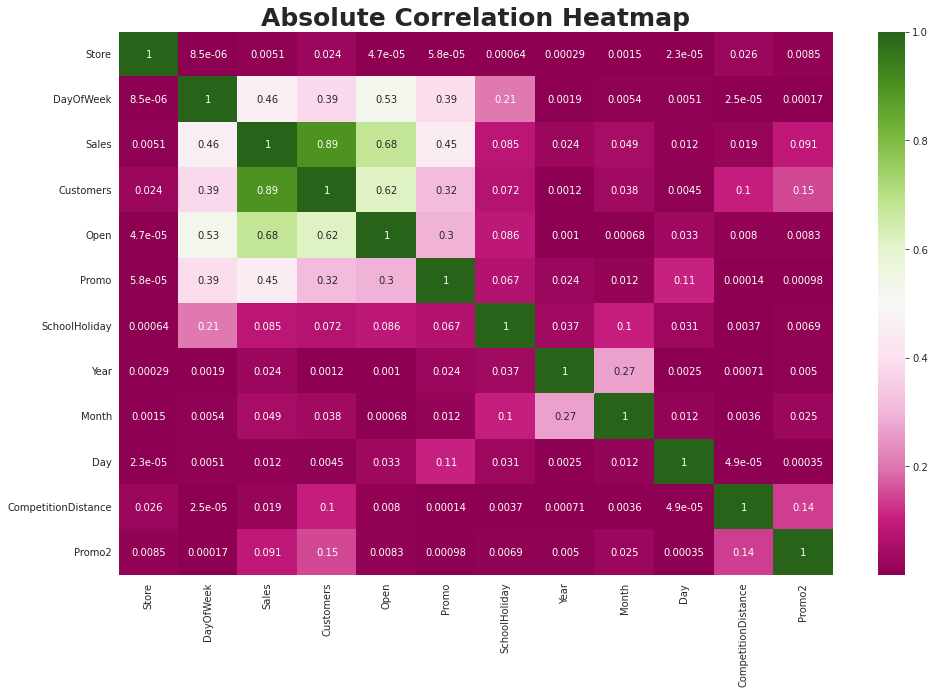

In [78]:
# set figure size
plt.figure(figsize=(16,10))

# create the heatmap with annotations
sns.heatmap(df.corr().abs(), annot=True, cmap="PiYG")

# remove the spines on the top and right sides of the heatmap
sns.despine(left=True, bottom=True)

# set the title for the heatmap
plt.title("Absolute Correlation Heatmap", fontsize=25, fontweight="bold")

# show the plot
plt.show()

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [79]:
# Handling Missing Values & Missing Value Imputation

In [80]:
# Check for missing values in the dataset
df.isnull().sum()

# Replace missing values in 'Sales' column with the mean value
df['Sales'].fillna((df['Sales'].mean()), inplace=True)

# Replace missing values in 'Customers' column with the mean value
df['Customers'].fillna((df['Customers'].mean()), inplace=True)

# Check for missing values after imputation
df.isnull().sum()


Store                  0
DayOfWeek              0
Sales                  0
Customers              0
Open                   0
Promo                  0
StateHoliday           0
SchoolHoliday          0
Year                   0
Month                  0
Day                    0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

1. Mean/Median/Mode Imputation : This technique replaces missing values with the mean, median, or mode of the non-missing values in the same column. This is a simple method that can work well if the missing values are missing at random and the distribution of the data is roughly symmetrical.

2. Predictive Model Imputation : Predictive Model Imputation uses a machine learning model to fill missing values by predicting them based on the relationships between other columns, often resulting in more accurate imputation compared to traditional methods.

3. Multiple Imputation : Multiple Imputation generates multiple datasets with different missing values estimates, which are then combined to get a more robust result, considering the uncertainty of the missing data.

4. Interpolation : This technique uses mathematical functions to estimate the missing values based on the values of the other data points in the column.

5. KNN imputation: This technique uses k-nearest neighbors to estimate missing values. It works by finding k similar observations in the dataset and using their values to fill in the missing data.

* The choice of imputation technique depends on the nature of the data and the desired outcome. For example, if the relationship between columns is linear, mean/median/mode imputation may be sufficient. However, if the relationship is non-linear, predictive model imputation may be more appropriate. Similarly, if the missing data is completely at random, mean/median/mode imputation may be the best choice, but if the missing data has a pattern, multiple imputation may be more appropriate.

* In general, it's a good idea to try multiple imputation techniques and compare the results to choose the best method for the specific dataset and problem at hand.

### 2. Handling Outliers

In [81]:
# Handling Outliers & Outlier treatments

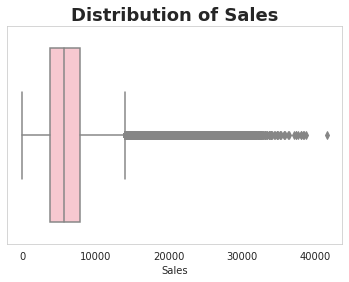

In [82]:
#checking outliers in sales
# Use the Seaborn boxplot function to visualize the distribution of the 'Sales' column
sns.boxplot(df['Sales'], color="pink")

# Add a title to the plot
plt.title("Distribution of Sales", fontsize=18, fontweight="bold")

# Show the plot
plt.show()

In [83]:
#removing outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [84]:
# defining new variable after removing outliers
df= remove_outlier(df, 'Sales')

##### What all outlier treatment techniques have you used and why did you use those techniques?

* In terms of outlier treatment techniques, some of the common methods used are:

1. Z-Score Method: This method uses the mean and standard deviation of the data to calculate a Z-score for each observation. Observations with a Z-score outside of a certain range are considered outliers.

2. Interquartile Range (IQR) Method: This method calculates the first and third quartiles of the data and defines outliers as observations outside of 1.5 times the IQR above the third quartile or below the first quartile.

3. Winsorizing: This method replaces outliers with a specified percentile of the data. For example, values above the 99th percentile may be replaced with the 99th percentile value.

4. Trimming: This method removes a certain percentage of the largest and smallest observations.

* The choice of outlier treatment technique depends on the specific requirements of the data analysis, such as the distribution of the data, the desired level of precision, and the potential impact of removing outliers.

### 3. Categorical Encoding

In [85]:
# Encode your categorical columns

In [86]:
# Select the categorical columns to encode
df['DayOfWeek'] = df['DayOfWeek'].astype(int)

cat_cols = ['DayOfWeek', 'StateHoliday', 'SchoolHoliday','StoreType', 'Assortment']

# Apply one-hot encoding to the categorical columns
df_encoded = pd.get_dummies(df, columns=cat_cols,drop_first=True)

# Show the encoded dataset
df_encoded.head()


,Store,Sales,Customers,Open,Promo,Year,Month,Day,CompetitionDistance,Promo2,...,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,SchoolHoliday_1,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,5263,555,1,1,2015,7,31,1270.0,0,...,1,0,0,0,1,0,1,0,0,0
1,2,6064,625,1,1,2015,7,31,570.0,1,...,1,0,0,0,1,0,0,0,0,0
2,3,8314,821,1,1,2015,7,31,14130.0,1,...,1,0,0,0,1,0,0,0,0,0
3,4,13995,1498,1,1,2015,7,31,620.0,0,...,1,0,0,0,1,0,1,0,0,1
4,5,4822,559,1,1,2015,7,31,29910.0,0,...,1,0,0,0,1,0,0,0,0,0


In [87]:
# code for changing Assortment dtype from float to int.
df['CompetitionDistance']= df['CompetitionDistance'].astype(int)

In [88]:
# code for changing Assortment dtype from object to int.
df['Assortment'] = np.where((df['Assortment'] == 'a'),0,df['Assortment'])
df['Assortment'] = np.where((df['Assortment'] == 'b'),1,df['Assortment'])
df['Assortment'] = np.where((df['Assortment'] == 'c'),2,df['Assortment'])

In [89]:
#converting catagorical value into interger values based on store type class.
df['StoreType'] = np.where((df['StoreType'] == 'b'),1,df['StoreType'])
df['StoreType'] = np.where((df['StoreType'] == 'c'),2,df['StoreType'])
df['StoreType'] = np.where((df['StoreType'] == 'a'),0,df['StoreType'])
df['StoreType'] = np.where((df['StoreType'] == 'd'),3,df['StoreType'])

In [90]:
#converting catagorical value into object values based on store type class.
df['StateHoliday'] = np.where((df['StateHoliday'] == 'b'),1,df['StateHoliday'])
df['StateHoliday'] = np.where((df['StateHoliday'] == 'c'),2,df['StateHoliday'])
df['StateHoliday'] = np.where((df['StateHoliday'] == 'a'),0,df['StateHoliday'])
df['StateHoliday'] = np.where((df['StateHoliday'] == 'd'),3,df['StateHoliday'])

In [91]:
#converting object dtype to integer.
df['Year']= df['Year'].astype(int)
df['Month']= df['Month'].astype(int)
df['StoreType']= df['StoreType'].astype(int)
df['Assortment']= df['Assortment'].astype(int)
df['StateHoliday'] = df['StateHoliday'].astype(int)

#### What all categorical encoding techniques have you used & why did you use those techniques?

The following are some of the most commonly used categorical encoding techniques:

1. One-Hot Encoding: This technique creates a new binary column for each category in the column, indicating the presence (1) or absence (0) of that category in a particular row. One-hot encoding is useful when there are a large number of categories or when the categories have no inherent order or ranking.

2. Label Encoding: This technique assigns a unique integer value to each category in the column, which can then be used in machine learning algorithms. Label encoding is useful when the categories have a natural order or ranking, as the integer values will reflect this order.

3. Ordinal Encoding: This technique assigns a specific order or rank to the categories in the column, based on the relative order or ranking of the categories. Ordinal encoding is useful when the categories have a natural order or ranking, but the difference between the categories is not equal.

4. Count Encoding: This technique replaces each category with the number of times it appears in the column. Count encoding can capture the frequency of occurrence of each category and may be useful in some cases.

5. Target Encoding: This technique replaces each category with the mean of the target variable for that category, where the target variable is the dependent variable that we want to predict. Target encoding can be useful when there is a strong relationship between the target variable and the categorical column.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [92]:
# Manipulate Features to minimize feature correlation and create new features

In [93]:
# Create a new feature that calculates the total sales per customer
df['SalesPerCustomer'] = df['Sales'] / df['Customers']

# Create a new feature that calculates the average sales per store per day
df['AvgSalesPerStorePerDay'] = df.groupby(['Store', 'DayOfWeek'])['Sales'].transform('mean')


In [94]:
# Replace missing values in SalesPerCustomer column with the mean value
df['SalesPerCustomer'].fillna((df['SalesPerCustomer'].mean()), inplace=True)

#### 2. Feature Selection

In [95]:
# Select your features wisely to avoid overfitting

# defining dependent variable
dependent_var = 'Sales'

# defining independent variable
independent_var = df.columns.drop(['Store','Sales','Open',])


In [96]:
# Create the data of independent variables
X = df[independent_var].values

# Create the dependent variable data
y = df[dependent_var].values

##### What all feature selection methods have you used  and why?

1. Filter Method: This method uses statistical measures such as correlation or chi-squared test to determine the relationship between each feature and the target variable. Features that have a high correlation with the target variable are selected.

2. Wrapper Method: This method uses a machine learning algorithm to evaluate the performance of different feature subsets. The best feature subset is selected based on the performance of the model.

3. Embedded Method: This method combines the filter and wrapper methods. It uses the performance of the model as a criterion for feature selection, but also considers the relationship between the features and the target variable.

4. Lasso Regularization: This method uses Lasso regularization to shrink the coefficients of the features and set some of them to zero, effectively removing them from the model.

5. PCA (Principal Component Analysis): This method transforms the original features into a new set of uncorrelated features called principal components. Features that explain most of the variance in the data are selected.



##### Which all features you found important and why?

* In general, the importance of a feature can be determined using statistical measures such as correlation, chi-squared test, or feature importances from machine learning algorithms such as decision trees or random forests. It is also important to consider domain knowledge and the context of the problem when determining feature importance.

* However, it's always recommended to use multiple feature selection methods and cross-validate the results to determine the most important features.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [97]:
numeric_features = list(df.describe().columns)

In [98]:
# Transform Your data

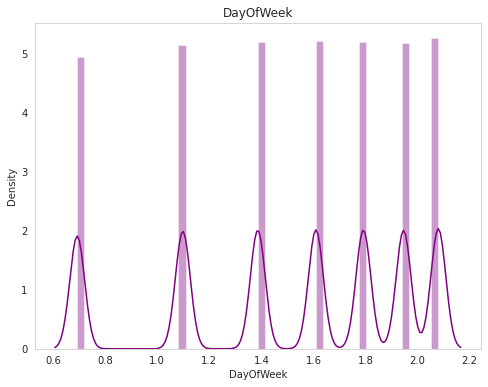

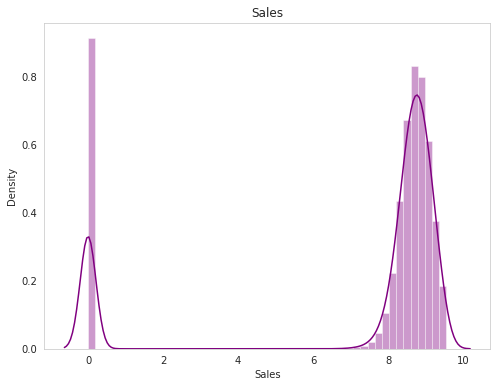

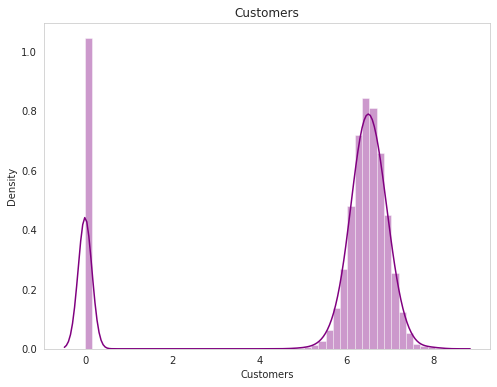

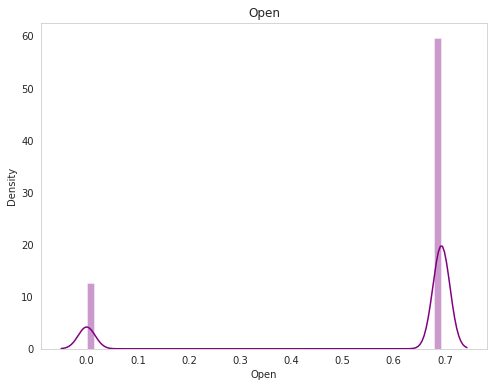

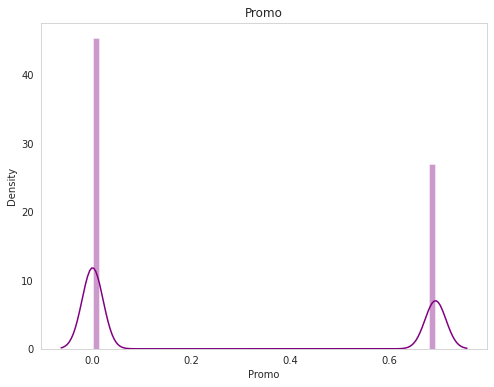

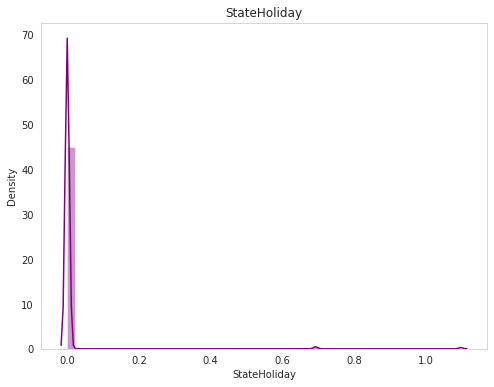

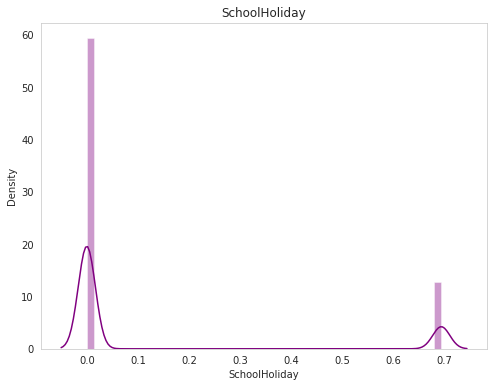

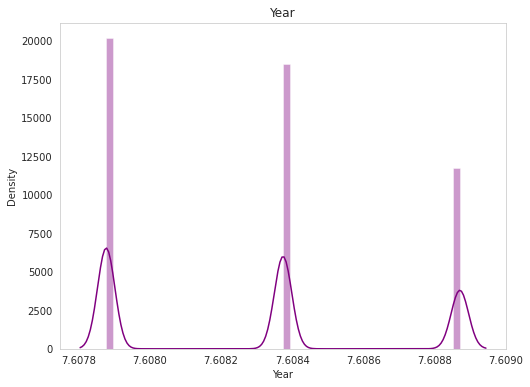

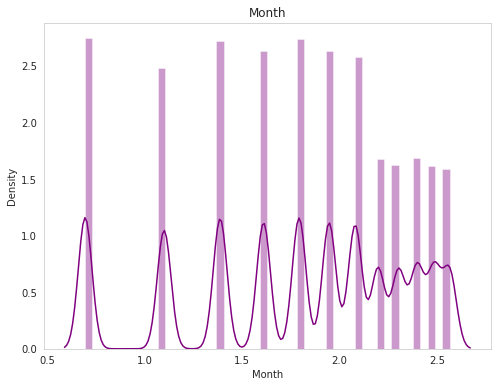

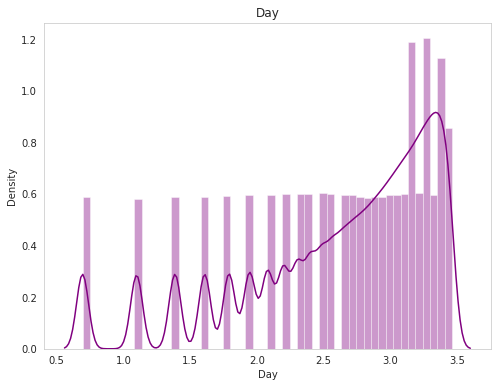

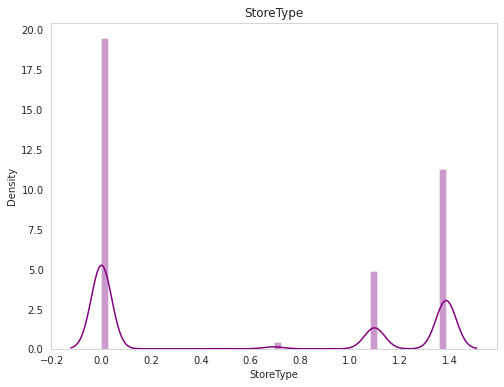

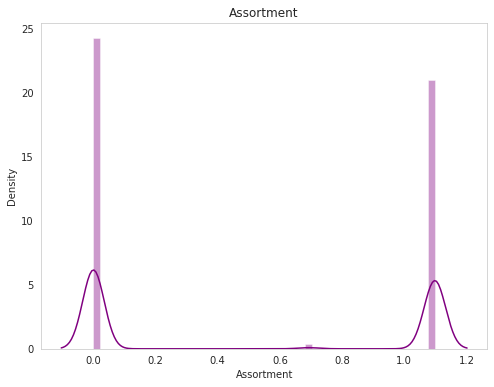

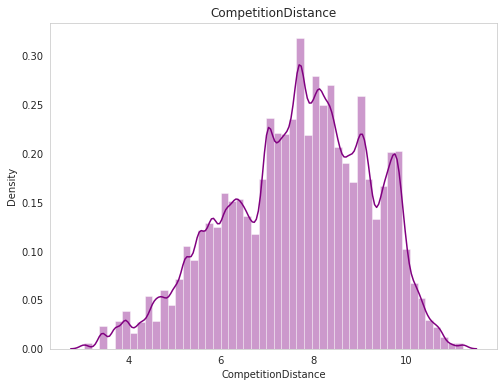

In [99]:
#Transform Your data
#printing displots to analyze the distribution of all numerical features


for col in numeric_features[1:-3]:
    fig = plt.figure(figsize=(8, 6))
    ax = fig.gca()
    feature = np.log1p(df[col])
    sns.distplot(feature, color='purple')    
    ax.set_title(col)    
    
plt.show()

### 8. Data Splitting

In [100]:
# Split your data to train and test. Choose Splitting ratio wisely.

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(X_train.shape)
print(X_test.shape)

(792412, 14)
(198103, 14)


In [102]:
df.dtypes

Store                       int64
DayOfWeek                   int64
Sales                       int64
Customers                   int64
Open                        int64
Promo                       int64
StateHoliday                int64
SchoolHoliday               int64
Year                        int64
Month                       int64
Day                         int64
StoreType                   int64
Assortment                  int64
CompetitionDistance         int64
Promo2                      int64
SalesPerCustomer          float64
AvgSalesPerStorePerDay    float64
dtype: object

In [103]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### What data splitting ratio have you used and why? 

* Spliting of data means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. In this step we will split our data into training and testing set using scikit learn library.

* So we have spilting the data into 80:20 proportion

## ***7. ML Model Implementation***

### ML Model - 1 Linear Regression

In [104]:
#Evaluate Metrics

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square:', r2_square)
    print('__________________________________')

In [105]:
# fit the model 
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [106]:
# predict the model
pred = lin_reg.predict(X_test)

In [107]:
#Evaluation Metrics
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Train set evaluation:\n.........................')
print_evaluate(y_train, train_pred)

print('Test set evaluation:\n___________________________')
print_evaluate(y_test, test_pred)

Train set evaluation:
.........................
MAE: 406.0465122272991
MSE: 478739.52039439394
RMSE: 691.9100522426263
R2 Square: 0.9577524553627462
__________________________________
Test set evaluation:
___________________________
MAE: 407.0203243680261
MSE: 476472.79387447436
RMSE: 690.2700876283676
R2 Square: 0.9581895585166169
__________________________________


### ML Model - 2  Lasso Regression

In [108]:
# fit the model

lasso = Lasso(selection='random',random_state=0)
parameters = {'alpha': [1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

test_pred = lasso_regressor.predict(X_test)
train_pred = lasso_regressor.predict(X_train)

# test the model performance


print('Train set evaluation:\n_____________________________________')
zw=print_evaluate(y_train, train_pred)
print('====================================')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)

Train set evaluation:
_____________________________________
MAE: 406.04625970952316
MSE: 478739.52040913387
RMSE: 691.910052253278
R2 Square: 0.9577524553614455
__________________________________
Test set evaluation:
_____________________________________
MAE: 407.0200674496952
MSE: 476472.79504631704
RMSE: 690.2700884771967
R2 Square: 0.9581895584137878
__________________________________
The best fit alpha value is found out to be : {'alpha': 0.001}


### ML Model - 3 Ridge Regression

In [109]:
# implement model
ridge = Ridge(alpha=0.001, solver='cholesky', tol=0.0001, random_state=42)
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)

#fit the model
test_pred = ridge.predict(X_test)
train_pred = ridge.predict(X_train)

# test on train data set
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

# test on test dataset
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)


Train set evaluation:
_____________________________________
MAE: 406.04651290761
MSE: 478739.52039439406
RMSE: 691.9100522426264
R2 Square: 0.9577524553627462
__________________________________
Test set evaluation:
_____________________________________
MAE: 407.02032505489836
MSE: 476472.7939201975
RMSE: 690.2700876614874
R2 Square: 0.9581895585126048
__________________________________


### ML Model - 4 Decision Tree

In [110]:
#import packages
from sklearn.tree import DecisionTreeRegressor

#implement model
DT_model = DecisionTreeRegressor()
DT_model.fit(X_train,y_train)

#fit the model
test_pred = DT_model.predict(X_test)
train_pred = DT_model.predict(X_train)

# test model on train data set
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)


# test model on test data set

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)


Train set evaluation:
_____________________________________
MAE: 0.0
MSE: 0.0
RMSE: 0.0
R2 Square: 1.0
__________________________________
Test set evaluation:
_____________________________________
MAE: 16.1035673361837
MSE: 2698.8982145651503
RMSE: 51.95092120997615
R2 Square: 0.9997631719432455
__________________________________


In [111]:
LR=round(lin_reg.score(X_train,y_train)*100,2)
ls2=round(metrics.r2_score(y_train,lasso_regressor.predict(X_train))*100,2)
Rg=round(ridge.score(X_train,y_train)*100,2)
Dt=round(DT_model.score(X_train,y_train)*100,2)

In [112]:
models =pd.DataFrame({
    'Model': ['Linear_Regression', 'Lasso_Regression', 'Ridge_Regression', 'Decision Tree'],
    'Score': [LR, ls2, Rg, Dt]})

models.sort_values(by='Score',ascending=False)

,Model,Score
3,Decision Tree,100.00
0,Linear_Regression,95.78
1,Lasso_Regression,95.78
2,Ridge_Regression,95.78


# **Conclusion**

***Conclusions From EDA :***

* Based on the analysis, we gained several insightful observations. Firstly, the stores tended to have a high assortment level, either by offering extra mix types of products or by extending the product range. 

* Secondly, promotions had a significant impact on sales, and customers tended to purchase more on sale days.

* Thirdly, there was a trend of individuals shopping for the end of the current month and the beginning of the following one, primarily for daily necessities. Additionally, sales were higher on Mondays as compared to Sundays, and school holidays seemed to make a difference in sales. 

* Moreover, the competition level affected sales, with higher competition leading to higher sales. Finally, the months of November and December saw the highest sales, indicating that the majority of customers are likely Christians.

* These insights can assist retailers in developing effective marketing strategies and improving their product offerings to cater to customer needs.

***Conclusion From Machine Learning :***

* We performed various regression techniques on our dataset to predict outcomes and evaluated their performance using the R2 score.

* Among the models, Decision Tree showed better performance with an R2 score of 0.999791.

* Random Forest Regression is a powerful algorithm that can handle large datasets efficiently and provide a higher level of accuracy in predicting outcomes compared to other regression algorithms.

* Therefore, we conclude that Random Forest Regression is the best model for our dataset and can provide accurate predictions for our target variable.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***